# Importing required libraries

In [1]:
# Simple CNN model for CIFAR-10
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.common.image_dim_ordering()

Using TensorFlow backend.
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflo

'tf'

In [2]:
seed = 7
numpy.random.seed(seed)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalizing and One-hot encoding the data

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

In [9]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 261s 5ms/step - loss: 1.7377 - accuracy: 0.3716 - val_loss: 1.4338 - val_accuracy: 0.4835
Epoch 2/5
50000/50000 [==============================] - 264s 5ms/step - loss: 1.4286 - accuracy: 0.4872 - val_loss: 1.3307 - val_accuracy: 0.5290
Epoch 3/5
50000/50000 [==============================] - 266s 5ms/step - loss: 1.3226 - accuracy: 0.5278 - val_loss: 1.2468 - val_accuracy: 0.5588
Epoch 4/5
50000/50000 [==============================] - 258s 5ms/step - loss: 1.2474 - accuracy: 0.5553 - val_loss: 1.1931 - val_accuracy: 0.5787
Epoch 5/5
50000/50000 [==============================] - 261s 5ms/step - loss: 1.1886 - accuracy: 0.5776 - val_loss: 1.1539 - val_accuracy: 0.5957


In [10]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy before adding qsn1: %.2f%%" % (scores[1]*100))

Accuracy before adding qsn1: 59.57%


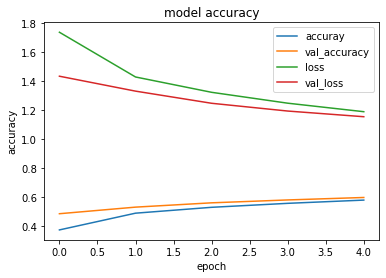

In [12]:
import matplotlib.pyplot as plt
# summarize history for accuracy&loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

# Adding layers to model

In [13]:

m = Sequential()
m.add(Conv2D(32, (3, 3), input_shape=(X_train.shape[1:]), padding='same', activation='relu'))
m.add(Dropout(0.2))
m.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m.add(Dropout(0.2))
m.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m.add(Dropout(0.2))
m.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
m.add(MaxPooling2D(pool_size=(2, 2)))
m.add(Flatten())
m.add(Dropout(0.2))
m.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
m.add(Dropout(0.2))
m.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
m.add(Dropout(0.2))
m.add(Dense(num_classes, activation='softmax'))

In [14]:
epochs = 5
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
m.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [15]:

print(m.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

# Fitting data and training model

In [16]:
history1=m.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 290s 6ms/step - loss: 2.0646 - accuracy: 0.2376 - val_loss: 1.7884 - val_accuracy: 0.3694
Epoch 2/5
50000/50000 [==============================] - 346s 7ms/step - loss: 1.6995 - accuracy: 0.3824 - val_loss: 1.5673 - val_accuracy: 0.4390
Epoch 3/5
50000/50000 [==============================] - 279s 6ms/step - loss: 1.5436 - accuracy: 0.4410 - val_loss: 1.4911 - val_accuracy: 0.4712
Epoch 4/5
50000/50000 [==============================] - 280s 6ms/step - loss: 1.4632 - accuracy: 0.4695 - val_loss: 1.4361 - val_accuracy: 0.4870
Epoch 5/5
50000/50000 [==============================] - 299s 6ms/step - loss: 1.4035 - accuracy: 0.4911 - val_loss: 1.3617 - val_accuracy: 0.5134


# Plotting Loss and Accuracy using history object

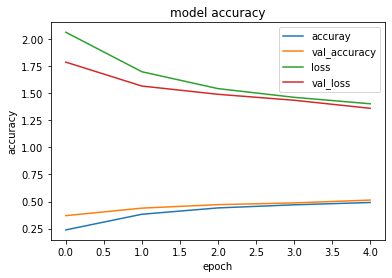

In [17]:
# summarize history for accuracy&loss
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

In [18]:
scores = m.evaluate(X_test, y_test, verbose=0)
print("Accuracy after qsn1: %.2f%%" % (scores[1]*100))

Accuracy after qsn1: 51.34%


# Saving and Loading model

In [19]:

m.save('model1.h5')

In [24]:
from keras.models import load_model
model = load_model('model1.h5')


# Predicting the test images

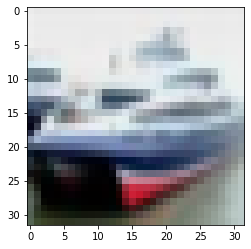

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 1


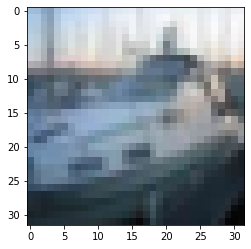

actual [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] predicted 8


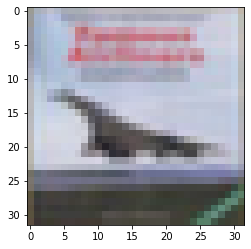

actual [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] predicted 8


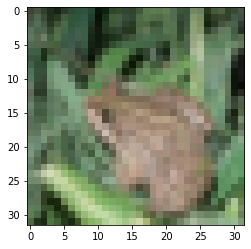

actual [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] predicted 6


In [25]:
import matplotlib.pyplot as plt
for k in range(1,5):
  plt.imshow(X_test[k,:,:])  
  plt.show()
  y=m.predict_classes(X_test[[k],:])
  print("actual",y_test[k],"predicted",y[0])